In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from collections import OrderedDict
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_excel('Xiaomi.xlsx')

In [3]:
df.head()

,TXNID,Day,Browser,Clicks,Pages,Time,Amount
0,1,Friday,Firefox,40,8,18.0,13440.0
1,2,Friday,Firefox,24,4,10.8,7038.0
2,3,Friday,Chrome,31,3,13.4,9875.0
3,4,Friday,Firefox,40,8,18.0,13440.0
4,5,Friday,Internet Explorer,19,4,5.6,6845.0


In [4]:
df.info() # As we can see here there are no null objects in the dataset and when we look at the datatypes, some are int,
            # object and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TXNID    43200 non-null  int64  
 1   Day      43200 non-null  object 
 2   Browser  43200 non-null  object 
 3   Clicks   43200 non-null  int64  
 4   Pages    43200 non-null  int64  
 5   Time     43200 non-null  float64
 6   Amount   43200 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.3+ MB


## Here we will handle the Dtype object and for that we will perform encoding with map function

In [5]:
df['Day'].value_counts()

Friday       9504
Monday       7776
Tuesday      6048
Saturday     6048
Wednesday    5184
Thursday     4320
Sunday       4320
Name: Day, dtype: int64

In [6]:
df['Browser'].value_counts()

Chrome               23328
Firefox              13824
Internet Explorer     6048
Name: Browser, dtype: int64

In [7]:
d={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
b={'Chrome':1,'Firefox':2,'Internet Explorer':3}

In [8]:
df['Day']=df['Day'].map(d)
df['Browser']=df['Browser'].map(b)

## Handling continuous data

In [9]:
df['Amount']=df['Amount'].astype('int64')
df['Time']=df['Time'].astype('int64')

In [27]:
df.head()

,Day,Browser,Clicks,Pages,Time,Amount
0,5,2,40,8,18,13440
1,5,2,24,4,10,7038
2,5,1,31,3,13,9875
3,5,2,40,8,18,13440
4,5,3,19,4,5,6845


## Next step is we will drop all the columns which are indicating uniqueness

In [11]:
df.drop('TXNID',axis=1,inplace=True)

## Let's look at the descriptive statistics

In [12]:
df.describe()

,Day,Browser,Clicks,Pages,Time,Amount
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,3.860000,1.600000,23.740000,4.820000,12.420000,6812.800000
std,1.990098,0.721119,8.267647,2.016853,5.953522,3201.910817
min,1.000000,1.000000,8.000000,2.000000,4.000000,1784.000000
25%,2.000000,1.000000,18.000000,3.000000,8.000000,4473.000000
50%,4.000000,1.000000,22.500000,4.500000,11.000000,6215.000000
75%,5.000000,2.000000,29.000000,6.000000,15.000000,8412.000000
max,7.000000,3.000000,46.000000,10.000000,32.000000,15851.000000


In [13]:
def custom_descriptive_stats(data):
    result=[] # This is an empty list to store the iterated result of stats
    skewtype=[]
    for col in data.columns:
        if data[col].dtype!='O':
            stats=OrderedDict({'Feature_name':col,
                               'Count':data[col].count(),
                               'Minimum':round(data[col].min(),2),
                               'Quartile 1':round(data[col].quantile(0.25),2),
                               'Mean':round(data[col].mean(),2),
                               'Median':round(data[col].median(),2),
                               'Quartile 3':round(data[col].quantile(0.75),2),
                               'Maximum':round(data[col].max(),2),
                               'Variance':round(data[col].var(),2),
                               'SD':round(data[col].std(),2),
                               'Kurtosis':round(data[col].kurt(),2),
                               'Skewness':round(data[col].skew(),2)
                               
                              })
            result.append(stats)
    #print(result)
    result_df=pd.DataFrame(data=result)
    # Adding skew type details to the DataFrame (final_result)
    for i in result_df['Skewness']:
        if i==0:
            skewtype.append('Normal Distribution')
        elif -.5<i<.5:
            skewtype.append('Fairly skewed Distribution')
        elif -1<i<-.5 or .5<i<1:
            skewtype.append('Moderately skewed Distribution')
        else:
            skewtype.append('Highly skewed Distribution')
    result_df['Skewtype']=skewtype
    return result_df

In [14]:
custom_descriptive_stats(df)

,Feature_name,Count,Minimum,Quartile 1,Mean,Median,Quartile 3,Maximum,Variance,SD,Kurtosis,Skewness,Skewtype
0,Day,43200,1,2.0,3.86,4.0,5.0,7,3.96,1.99,-1.29,-0.05,Fairly skewed Distribution
1,Browser,43200,1,1.0,1.60,1.0,2.0,3,0.52,0.72,-0.72,0.77,Moderately skewed Distribution
2,Clicks,43200,8,18.0,23.74,22.5,29.0,46,68.35,8.27,0.03,0.68,Moderately skewed Distribution
3,Pages,43200,2,3.0,4.82,4.5,6.0,10,4.07,2.02,0.03,0.63,Moderately skewed Distribution
4,Time,43200,4,8.0,12.42,11.0,15.0,32,35.44,5.95,2.02,1.42,Highly skewed Distribution
5,Amount,43200,1784,4473.0,6812.80,6215.0,8412.0,15851,10252232.88,3201.91,0.67,1.02,Highly skewed Distribution


## Let's look at the visualization

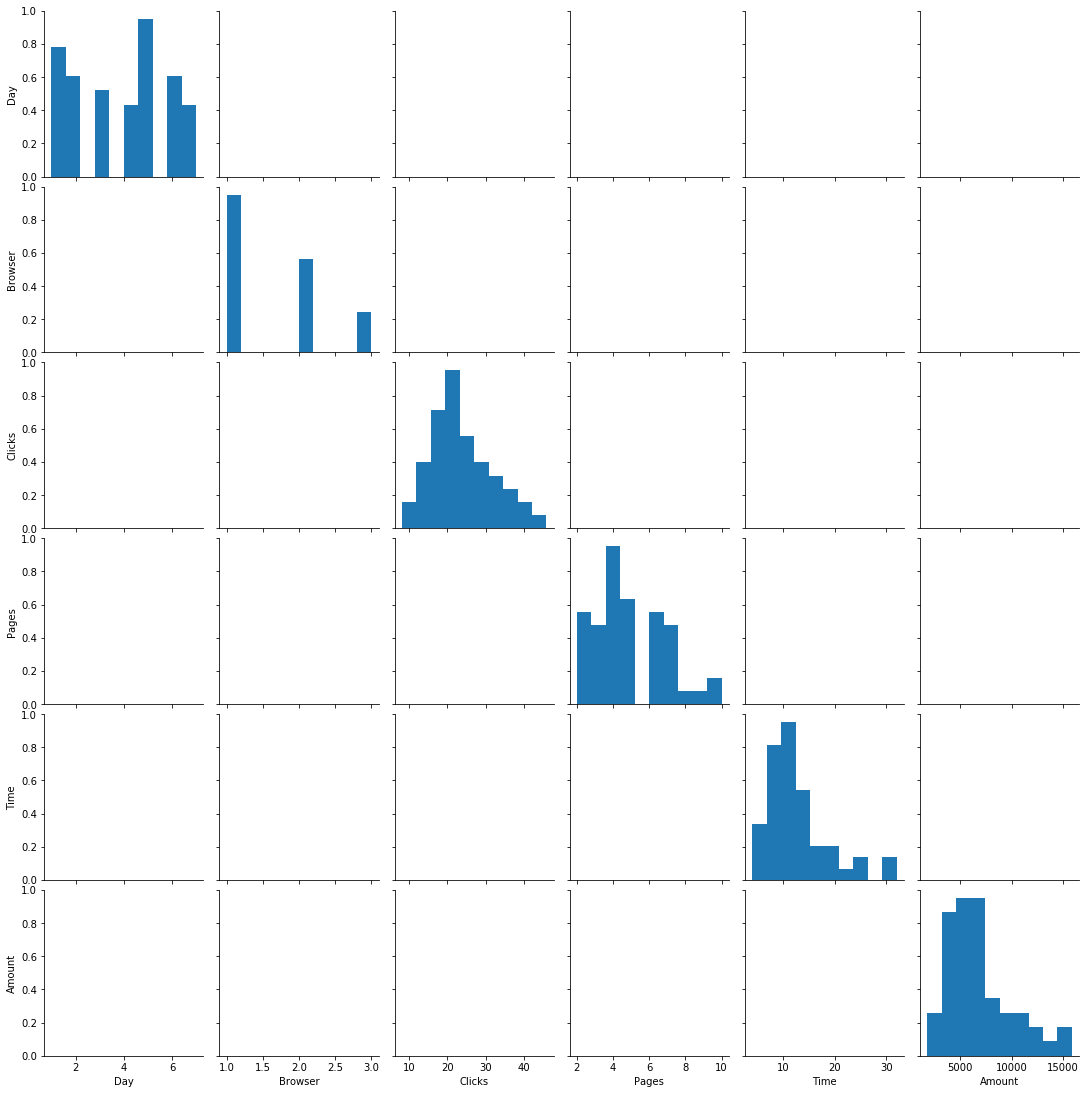

In [15]:
sns.pairplot(df,kind='dist')

## Checking multi-colinearity

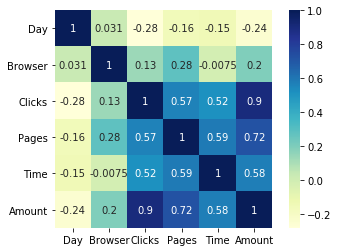

In [16]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True,square=True,linewidths=0)

## Spliting Data

In [17]:
x=df.drop('Amount',axis=1)
y=df['Amount']

In [18]:
# x_train,x_test,y_train,yELk kted4h5dr.;jxdgawhblt' vgY3DK,9HATHANIMAISSOCUTEIKNOWWWWW

In [19]:
# x_train,motta is gaandu 

In [20]:
# motta is chutiya

In [21]:
# motta is bakchod

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

## Building models

### Linear Regression

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lrpred=lr.predict(x_test)

In [29]:
lrscore=r2_score(y_test,lrpred)
lrscore

0.8815052166836567

In [32]:
rms = sqrt(mean_squared_error(y_test,lrpred))
rms

1104.284764033211

In [33]:
# Performing cross validation on Linear Regression

In [43]:
lrcross=cross_val_score(lr,x,y,scoring='r2',cv=10)
np.mean(lrcross)

0.7301813321400107

In [38]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']